# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a suburb or town in a Boston. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

### **Please read the instructions carefully before starting the project.**

This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.

* Blanks '_______' are provided in the notebook that needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# Fill in the blank" or "# Complete the code". Running incomplete code may throw an error.
* Remove the blank and state your observations in detail wherever the mark down says 'Write your observations here:_________'
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final report.

## **Importing the necessary libraries and overview of the dataset**

In [ ]:
# Import libraries for data manipulation
import pandas as pd

import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt

import seaborn as sns
sns.color_palette("rocket_r", as_cmap=True)

from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### **Loading the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/My Drive/MIT-PE/Elective/Boston.csv") ## Complete the code

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Observations:**
The dataset contains 13 features describing housing and neighborhood characteristics in Boston, along with the target variable (MEDV) representing house prices. Initial rows show variation in crime rate, number of rooms, population status, and housing prices, indicating a diverse set of conditions across neighborhoods.

### **Data Overview**

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [ ]:
df.shape   # Complete the code

(506, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Observations:**

- There are a total of **506 non-null observations in each of the columns**. This indicates that there are **no missing values** in the data.
- There are **13 columns** in the dataset and **every column is of numeric data type**.
- The target variable is MEDV.
- The features capture demographic, environmental, and housing characteristics. - The dataset is small in size and ready for statistical analysis and regression modeling.

### **Summary Statistics of this Dataset**

In [ ]:
df.describe() ## Complete the code to print the statistical summary of the data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


**Observations**:
* CRIM	Very skewed: the mean crime rate is low but the max is very high – there are a few high-crime tracts.
* ZN / INDUS	Many zeros in ZN (no large residential lots in most tracts). INDUS ranges widely (from almost 0 to 27+).
* vCHAS	Mostly 0; very few tracts actually border the Charles River (dummy variable).
* NOX	Narrower spread (around 0.4–0.9 parts per 10 million).
* RM	Average rooms per dwelling ~6, but some tracts have <4 and some >8.
* AGE	Median often high (many houses built before 1940), but some newer areas exist.
* IS	Distances range from very close to employment centers (<2) to quite far (>12).
* RAD	Discrete values; some tracts have high highway accessibility (e.g., 24)

* TAX	Tax rates vary dramatically (from ~190 to ~711 per $10,000).

* PTRATIO	Pupil/teacher ratios cluster ~17–20 but can go lower or higher.

* LSTAT	% of lower status population ranges widely (from ~1% to 37%).

* MEDV target	Median home value clusters around  22K,
but can go as low as  5K and as high as  50K (the cap in the dataset).


**Overall patterns from the statistical summary:**

* Different scales: variables like CRIM and TAX have very different magnitudes—need scaling before many models.

* Skew/outliers: CRIM, LSTAT, TAX show heavy skew; you might log-transform or handle outliers.

* Mixture of continuous and discrete variables: (RM, LSTAT vs. RAD, CHAS).

* Target capped at 50: MEDV maxes at 50.0, which is a known limitation.

### Checking for missing values

In [ ]:
df.duplicated() ## Complete the code to check duplicate entries in the data

,0
0,False
1,False
2,False
3,False
4,False
...,...
501,False
502,False
503,False
504,False


## **Exploratory Data Analysis and Data Preprocessing**

### **Univariate Analysis**

**Let's check the distribution of the variables**

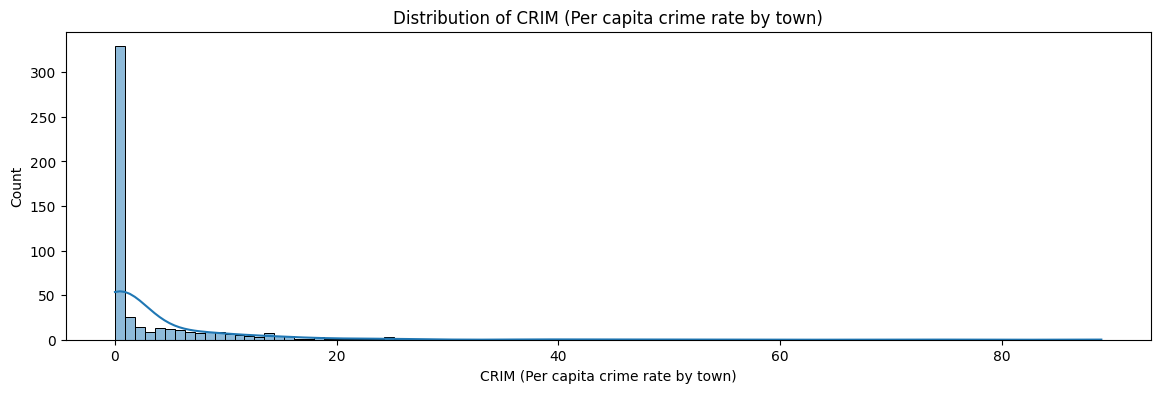

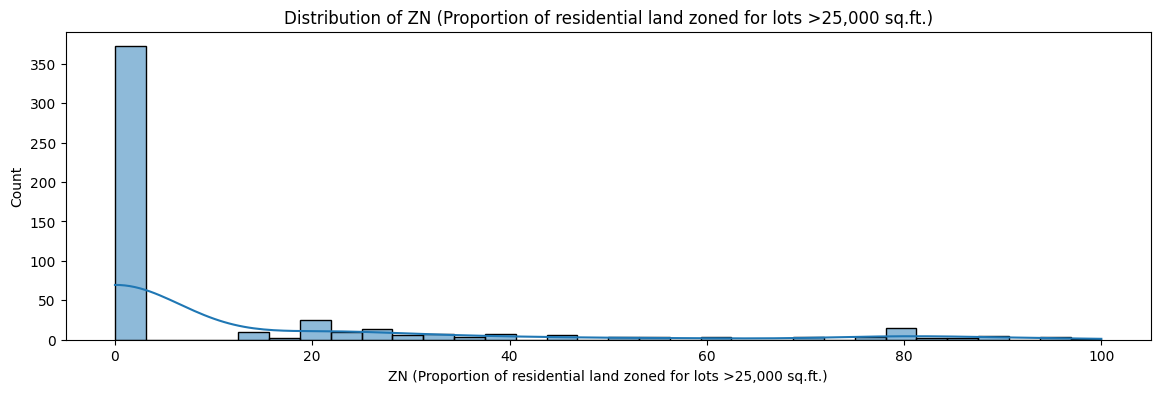

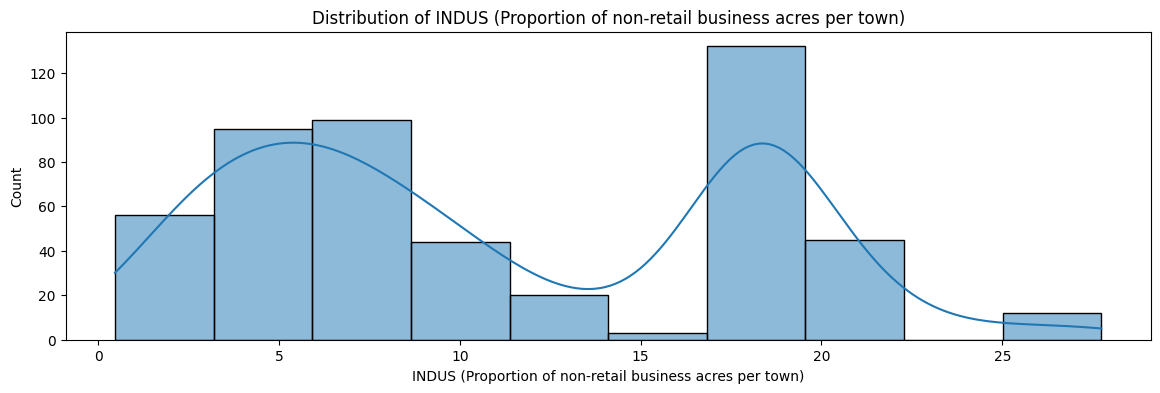

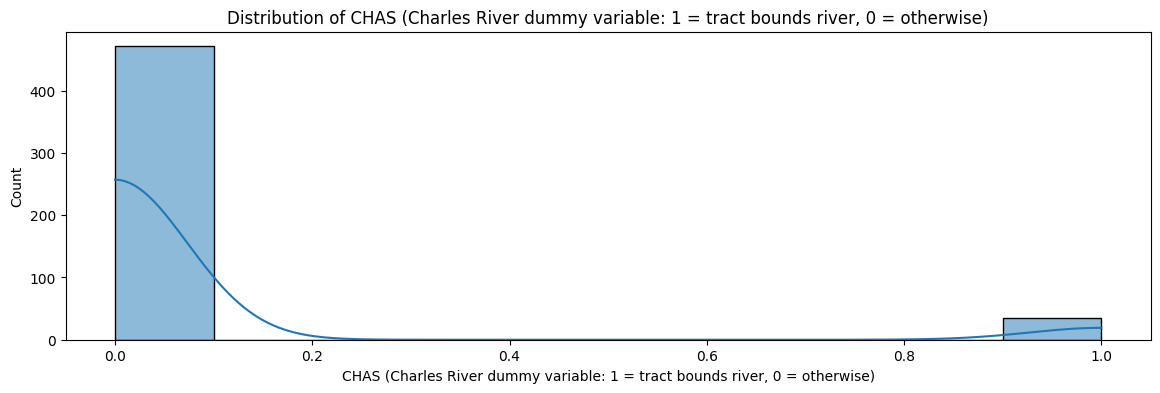

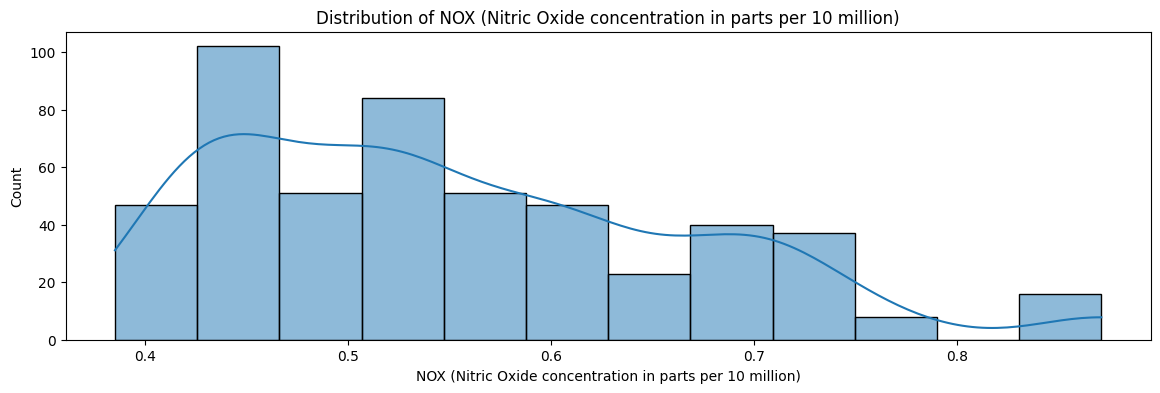

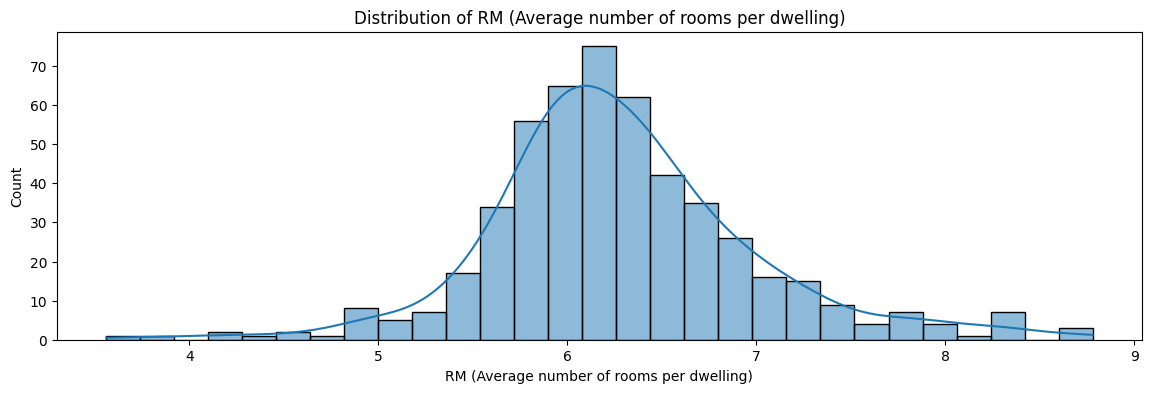

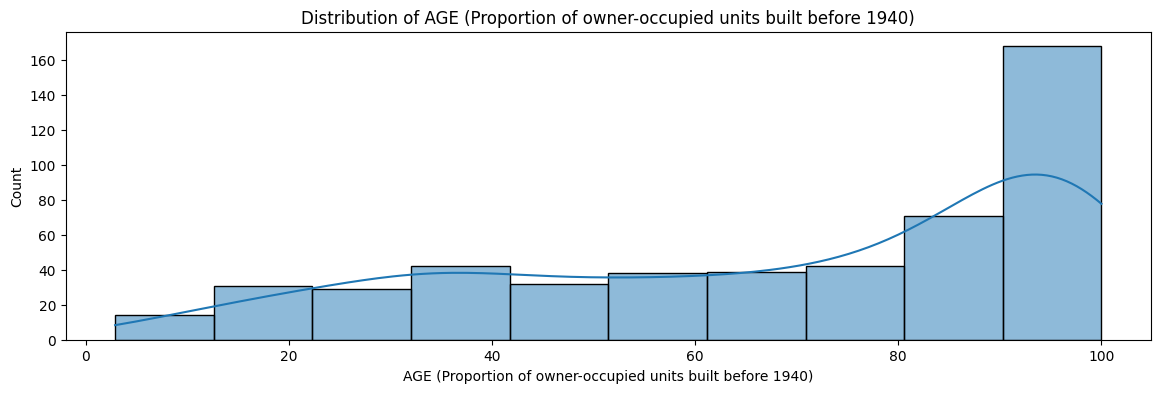

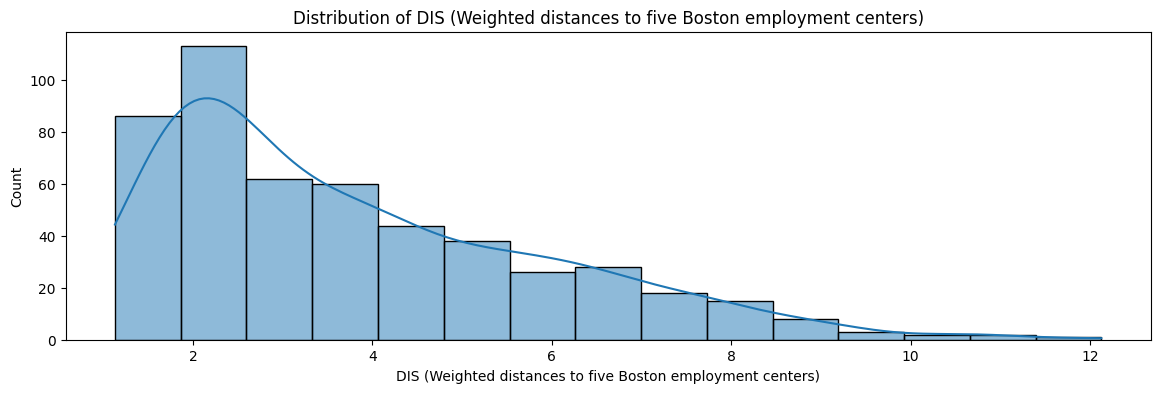

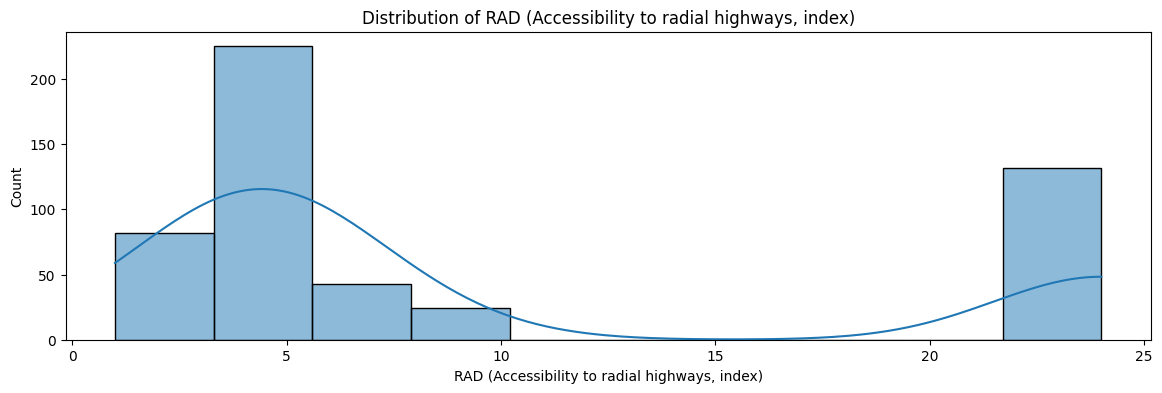

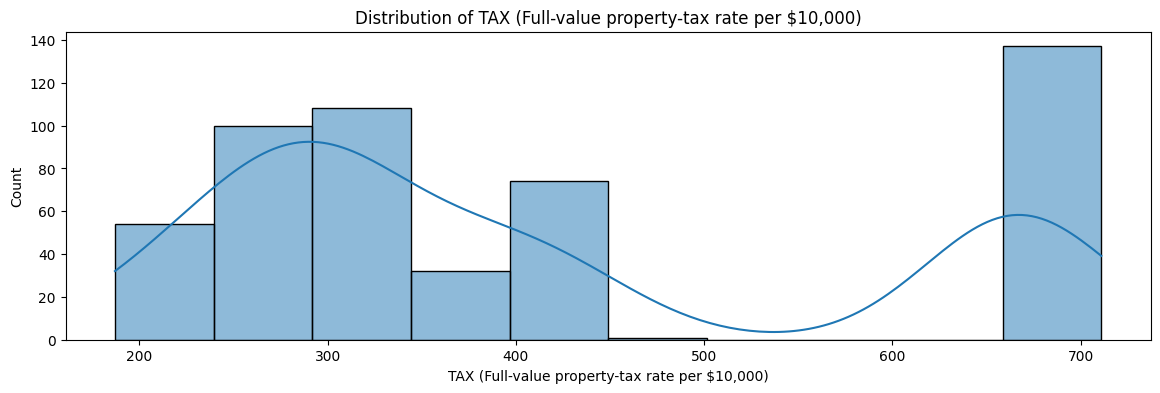

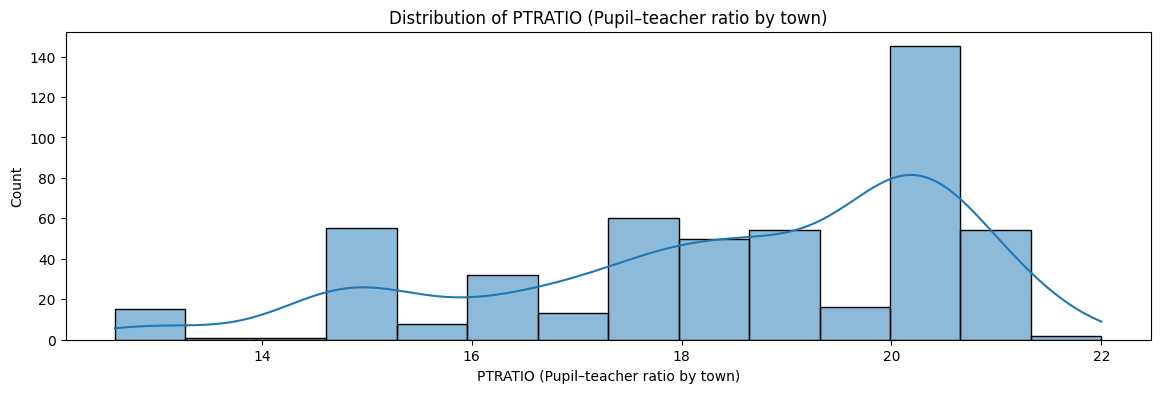

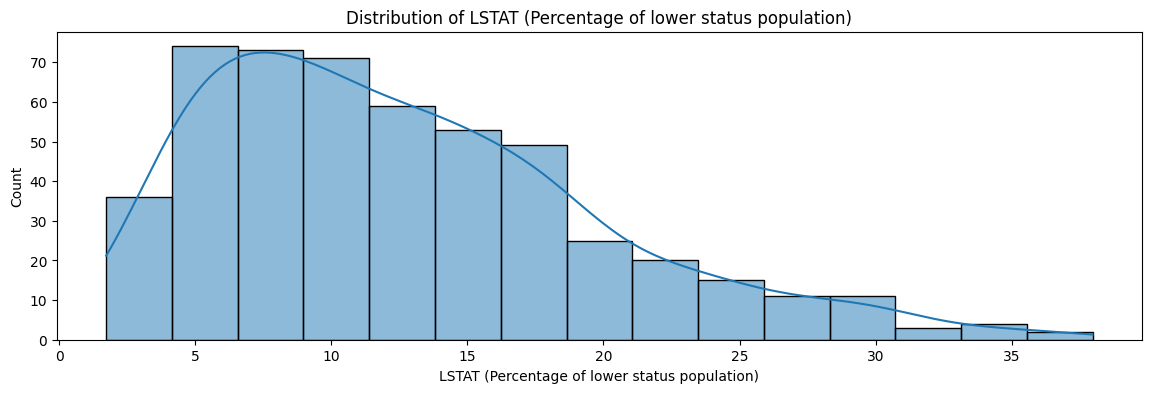

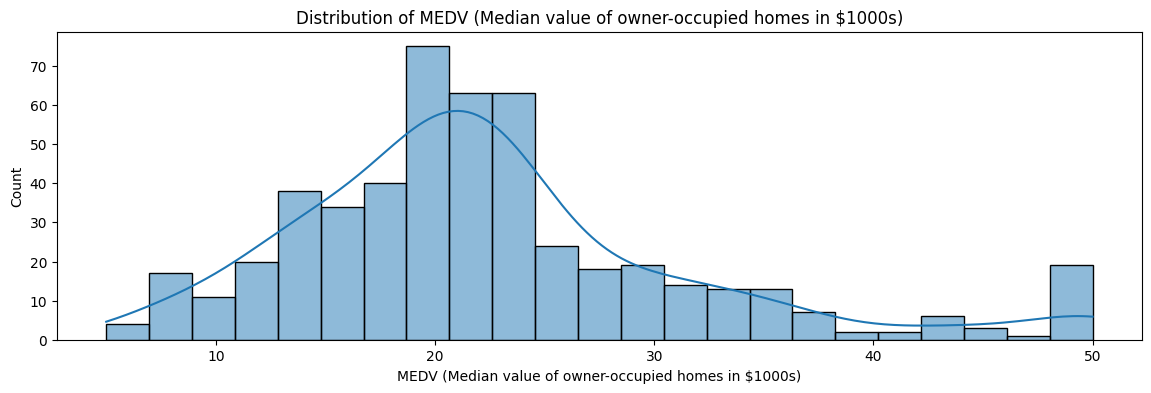

In [ ]:
# 1. Create a mapping of original column names to pretty names
pretty_names = {
    "CRIM": "CRIM (Per capita crime rate by town)",
    "ZN": "ZN (Proportion of residential land zoned for lots >25,000 sq.ft.)",
    "INDUS": "INDUS (Proportion of non-retail business acres per town)",
    "CHAS": "CHAS (Charles River dummy variable: 1 = tract bounds river, 0 = otherwise)",
    "NOX": "NOX (Nitric Oxide concentration in parts per 10 million)",
    "RM": "RM (Average number of rooms per dwelling)",
    "AGE": "AGE (Proportion of owner-occupied units built before 1940)",
    "DIS": "DIS (Weighted distances to five Boston employment centers)",
    "RAD": "RAD (Accessibility to radial highways, index)",
    "TAX": "TAX (Full-value property-tax rate per $10,000)",
    "PTRATIO": "PTRATIO (Pupil–teacher ratio by town)",
    "LSTAT": "LSTAT (Percentage of lower status population)",
    "MEDV": "MEDV (Median value of owner-occupied homes in $1000s)"
}

# 2. Use the mapping in your loop
for i in df.columns:  # take each column name
    plt.figure(figsize=(14, 4))  # create a new figure
    sns.histplot(data=df, x=i, kde=True)  # plot histogram + KDE
    pretty = pretty_names.get(i, i)       # fallback to original if not found
    plt.title(f'Distribution of {pretty}')
    plt.xlabel(pretty)                    # nicer x-label
    plt.show()

Observations:

| Column            | What the distribution shows                                                                                                                |
| ----------------- | ------------------------------------------------------------------------------------------------------------------------------------------ |
| **CRIM (Crime rate)**          | Very right-skewed: most tracts have very low crime, but a few have much higher values. This is typical of a variable with strong outliers. |
| **ZN (Residential land zoned >25,000 sq.ft.)**            | A spike at 0: most areas have no large residential zoning; a few have some. Strongly right-skewed.                                                                |
| **INDUS (Non-retail business acres proportion)**         | Bimodalish but mostly concentrated at lower values; again a long tail.                                                                     |
| **CHAS (Charles River dummy)**          | Almost all 0, a few 1. It’s a dummy variable so theres just two spikes.                                                                   |
| **NOX (Nitric oxide concentration)**           | Slight right skew, values mostly concentrated between 0.4 and 0.8.                                                                               |
| **RM (Average rooms per dwelling)**            | Bell-shaped around 6–7 rooms; a few high-end homes  with more than 8 rooms.                                                                               |
| **AGE (Older owner-occupied units)**           | U-shaped tendency — many towns with very new housing (low values) or very old housing (high values).                                                     |
| **DIS (Weighted distances to employment centers)**           | Heavily skewed: most tracts closer to employment centers, fewer far out.                                                                          |
| **RAD (Highway accessibility index)**           | strongly right-skewed with peaks at certain index values (esp. 24                                                                         |
| **TAX (Property tax rate)**           | Spikes at a few tax levels; some areas with much higher taxes.                                                                    |
| **PTRATIO (Pupil–teacher ratio)**       | Peaks around 17–19 students per teacher.                                                                                      |
| **LSTAT (Lower status %)**         | Right-skewed, most neighborhoods have low to moderate values, but a long tail toward higher % of lower status population.                                            |
| **MEDV (Median home value $1000s)**  | Slightly left-skewed (capped at 50), most homes cluster between 20–25k, with ceiling effect at the top end.|



As the dependent variable is sightly skewed, we will apply a **log transformation on the 'MEDV' column** and check the distribution of the transformed column.

In [ ]:
df['MEDV_log'] = np.log(df['MEDV'])

<Axes: xlabel='MEDV_log', ylabel='Count'>

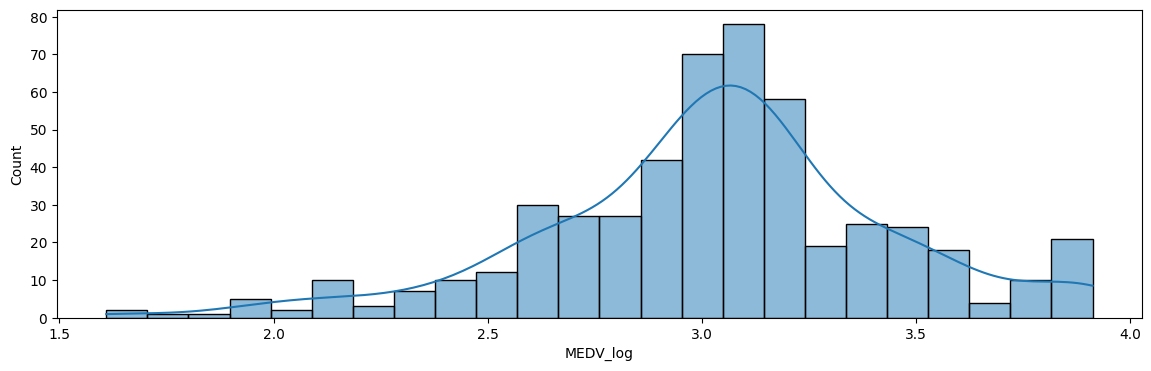

In [ ]:
plt.figure(figsize=(14, 4))
sns.histplot(data = df, x = 'MEDV_log', kde = True)

**Observation:**

- The log-transformed variable (**MEDV_log**) appears to have a **nearly normal distribution without skew**, and hence we can proceed.

Before creating the linear regression model, it is important to check the bivariate relationship between the variables. Let's check the same using the heatmap and scatterplot.

### **Bivariate Analysis**

**Let's check the correlation using the heatmap**

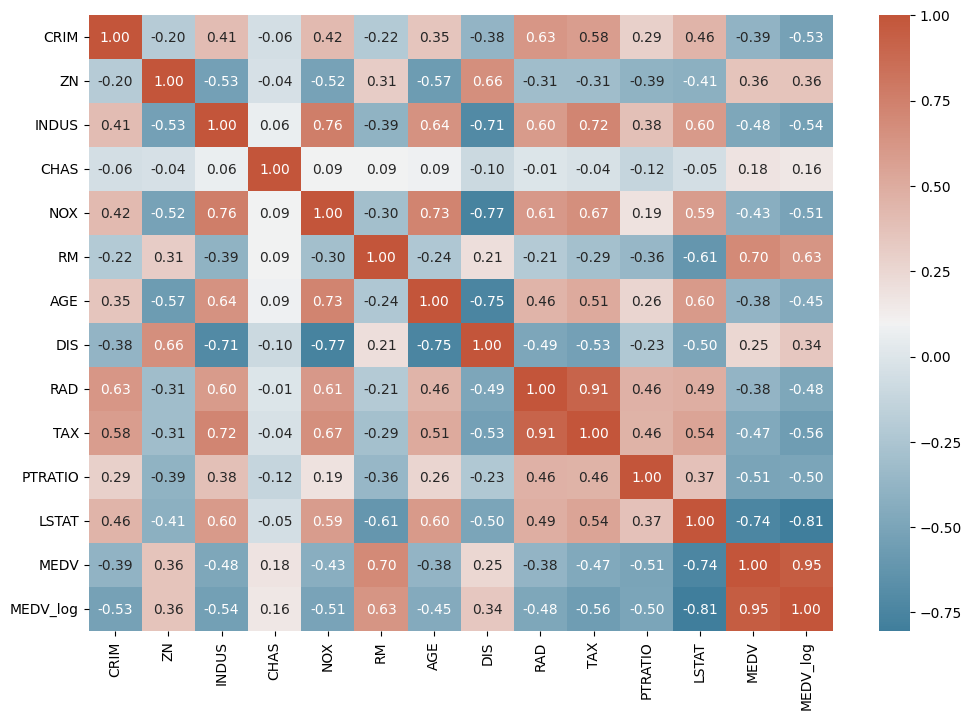

In [ ]:
plt.figure(figsize = (12, 8))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = cmap) ## Complete the code
plt.show()

**Observations:**

**Key Drivers of Home Value** (Target = MEDV)

RM (Average rooms per dwelling) → Strong positive correlation (~+0.7). Larger homes are associated with higher property values.

LSTAT (% lower-status population) → Strong negative correlation (~–0.74). Higher poverty levels strongly depress property values.

PTRATIO (Pupil–teacher ratio) → Moderate negative correlation (~–0.5). Larger class sizes (poorer school quality) reduce home values.

DIS (Distance to employment centers) → Slight positive correlation. More suburban areas tend to have marginally higher values.

These findings highlight that socio-economic status, education quality, and housing size are the most influential factors for predicting median home value.

**Multicollinearity Risks**

Several predictors are strongly correlated with each other, creating redundancy that may destabilize regression models:

TAX ↔ RAD (+0.91) → Property tax rates rise almost in lockstep with highway accessibility.

NOX ↔ INDUS (+0.76) → Industrial areas exhibit higher pollution levels.

AGE ↔ NOX (+0.73) → Older homes are concentrated in more polluted, inner-city areas.

This suggests a need for feature selection or regularization (e.g., Ridge, Lasso) when modeling.

**Conclusion**

Core predictors for home value: RM, LSTAT, PTRATIO.

Environmental/structural features (NOX, INDUS, TAX, RAD) provide context but introduce redundancy.

Proper handling of multicollinearity will ensure more robust, interpretable models.

Now, we will visualize the relationship between the pairs of features having significant correlations.

*italicized text*### **Visualizing the relationship between the features having significant correlations (>= 0.7 or <= -0.7)**

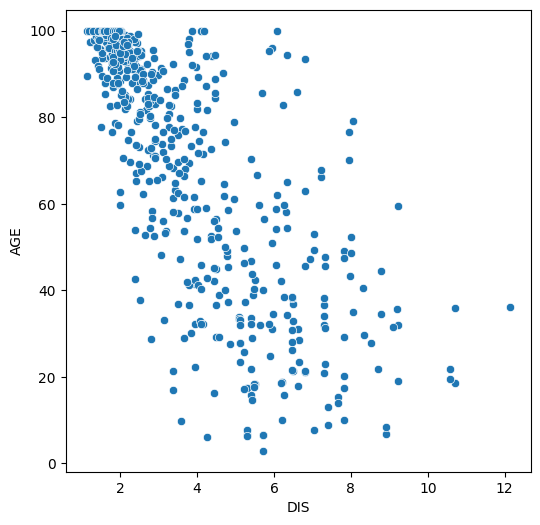

In [ ]:
# Scatterplot to visualize the relationship between DIS and AGE
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'DIS', y = 'AGE', data = df)

plt.show()

**Observations:**
- The distance of the houses to the Boston employment centers appears to decrease moderately as the the proportion of the old houses increase in the town. It is possible that the Boston employment centers are located in the established towns where proportion of owner-occupied units built prior to 1940 is comparatively high.

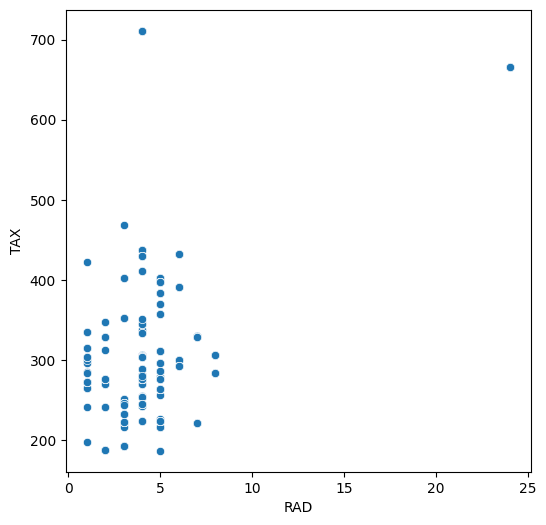

In [ ]:
# Scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RAD', y = 'TAX', data = df)

plt.show()

**Observations:**

- The correlation between RAD and TAX is very high. But, no trend is visible between the two variables.
- The strong correlation might be due to outliers.

Let's check the correlation after removing the outliers.

In [ ]:
# Remove the data corresponding to high tax rate
df1 = df[df['TAX'] < 600]

# Import the required function
from scipy.stats import pearsonr

# Calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.24975731331429196


**Observation:**

- So, the high correlation between TAX and RAD is due to the outliers. The tax rate for some properties might be higher due to some other reason.

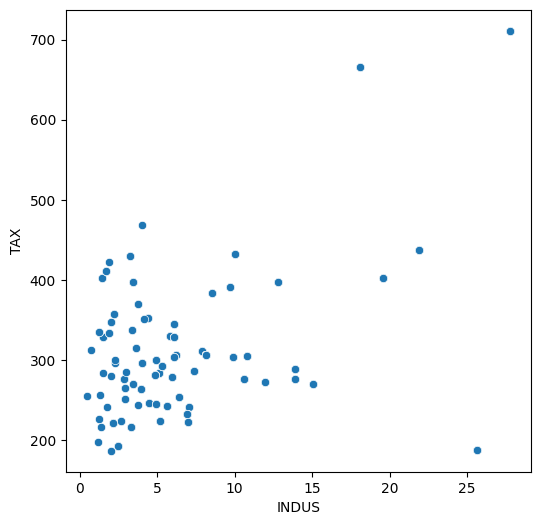

In [ ]:
# Scatterplot to visualize the relationship between INDUS and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'INDUS', y = 'TAX', data = df)

plt.show()

**Observations:**

- The tax rate appears to increase with an increase in the proportion of non-retail business acres per town. This might be due to the reason that the variables TAX and INDUS are related with a third variable.

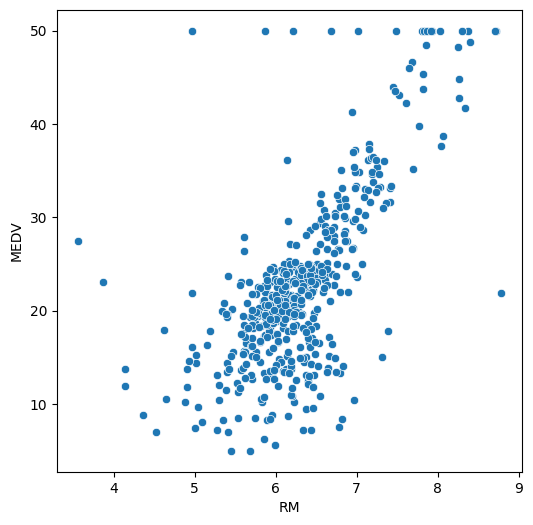

In [ ]:
# Scatterplot to visulaize the relationship between RM and MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RM', y = 'MEDV', data = df)

plt.show()

**Observations:**

- The price of the house seems to increase as the value of RM increases. This is expected as the price is generally higher for more rooms.

- There are a few outliers in a horizontal line as the MEDV value seems to be capped at 50.

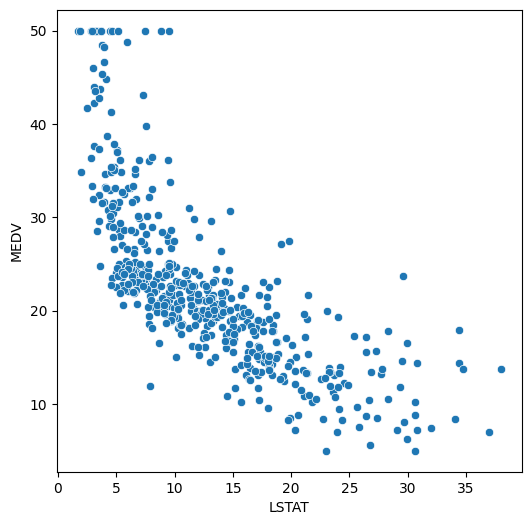

In [ ]:
# Scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df)

plt.show()

**Observations:**

- The price of the house tends to decrease with an increase in LSTAT. This is also possible as the house price is lower in areas where lower status people live.
- There are few outliers and the data seems to be capped at 50.

- **Create a scatter plot to visualize the relationship between the remaining features having significant correlations (>= 0.7 or <= -0.7)**
    - INDUS and NOX
    - AGE and NOX
    - DIS and NOX
- **Write your observations from the plots**

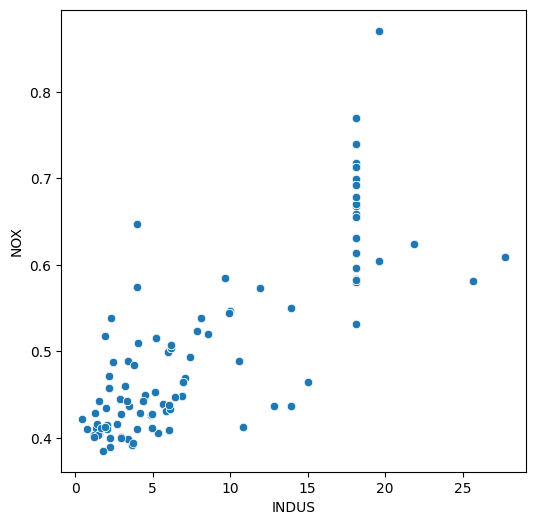

In [ ]:
# Scatterplot to visualize the relationship between INDUS and NOX
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'INDUS', y = 'NOX', data = df)
## Complete the code

plt.show()

**Observations:**
Higher industrial land use (INDUS) is associated with higher pollution levels (NOX), showing a clear positive relationship reflecting the environmental cost of industrial activity.

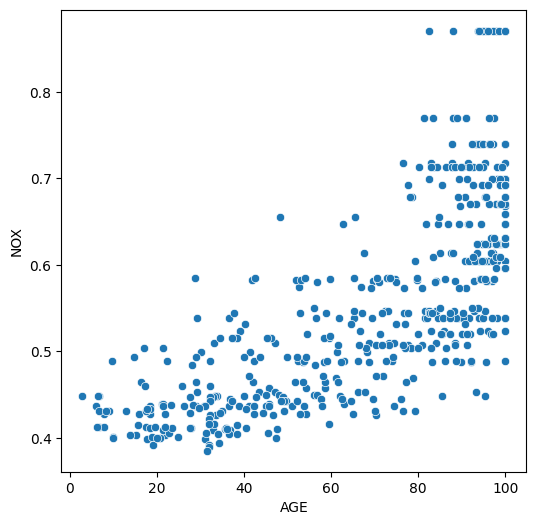

In [ ]:
# Scatterplot to visualize the relationship between AGE and NOX
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'AGE', y = 'NOX', data = df)
## Complete the code

plt.show()

**Observations:**
Neighborhoods with older housing stock (higher AGE) are associated with higher pollution levels (higher NOX), suggesting that older, inner-city areas tend to face poorer air quality.

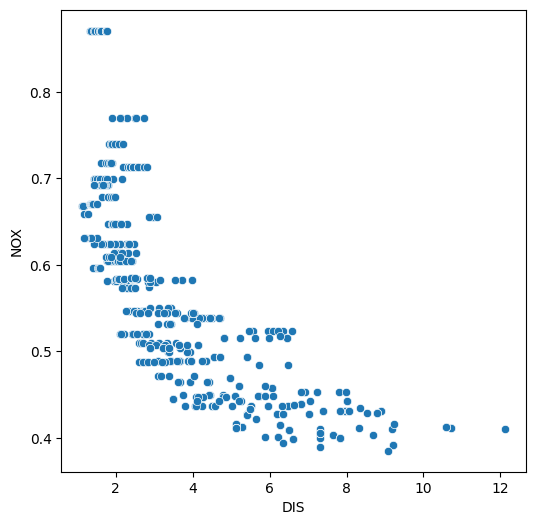

In [ ]:
# Scatterplot to visualize the relationship between DIS and NOX
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'DIS', y = 'NOX', data = df)
## Complete the code

plt.show()

**Observations:**
Towns located farther from employment centers (higher DIS) tend to have lower pollution levels (NOX), showing a strong negative relationship. This suggests suburban areas generally enjoy cleaner air compared to inner-city locations.

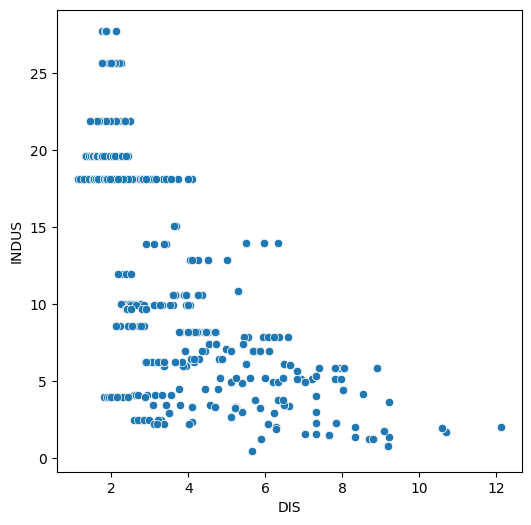

In [ ]:
# Scatterplot to visualize the relationship between DIS and INDUS
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'DIS', y = 'INDUS', data = df)
## Complete the code

plt.show()

**Observations:**
Areas farther from employment centers (higher DIS) tend to have less industrial land use (lower INDUS), showing a strong negative relationship. This suggests that suburban locations are less industrialized compared to inner-city areas.

We have seen that the variables LSTAT and RM have a linear relationship with the dependent variable MEDV. Also, there are significant relationships among few independent variables, which is not desirable for a linear regression model. Let's first split the dataset.

> Add blockquote



### **Split the dataset**

Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test sets.

In [ ]:
# Separate the dependent variable and indepedent variables
Y = df['MEDV_log']

X = df.drop(columns = {'MEDV', 'MEDV_log'})

# Add the intercept term
X = sm.add_constant(X)

In [ ]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

Next, we will check the multicollinearity in the training dataset.

### **Check for Multicollinearity**

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped / treated till all the features have a VIF score < 5

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


**Observations:**

- There are two variables with a high VIF - RAD and TAX (greater than 5).
- Let's remove TAX as it has the highest VIF values and check the multicollinearity again.

In [ ]:
# Create the model after dropping TAX
X_train = X_train.drop("TAX", axis=1)  ## Complete the code

# Check for VIF
print(checking_vif(X_train))

    feature         VIF
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251


Now, we will create the linear regression model as the VIF is less than 5 for all the independent variables, and we can assume that multicollinearity has been removed between the variables.

**Hint:** Use the sm.OLS() model on the training data

In [ ]:
# Create the model
X_train_const = sm.add_constant(X_train)
model1 = sm.OLS(y_train, X_train_const).fit()# Write your code here

# Get the model summary
model1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Thu, 02 Oct 2025   Prob (F-statistic):          1.40e-101
Time:                        09:16:54   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6324      0.243     19.057      0.000       4.154       5.111
CRIM          -0.0128      0.002     -7.445      0.000      -0.016      -0.009
ZN             0.0010      0.001      1.425      0.155      -0.000       0.002
INDUS         -0.0004      0.003     -0.148      0.883      -0.006       0.005
CHAS           0.1196      0.039      3.082      0.002       0.043       0.196
NOX           -1.0598      0.187     -5.675      0.000      -1.427      -0.692
RM             0.0532      0.021      2.560      0.011       0.012       0.094
AGE            0.0003      0.001      0.461      0.645      -0.001       0.002
DIS           -0.0503      0.010     -4.894      0.000      -0.071      -0.030
RAD            0.0076      0.002      3.699      0.000       0.004       0.012
PTRATIO       -0.0452      0.007     -6.659      0.000      -0.059      -0.032
LSTAT         -0.0298      0.002    -12.134      0.000      -0.035      -0.025
==============================================================================
Omnibus:                       30.699   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.718
Skew:                           0.372   Prob(JB):                     6.62e-19
Kurtosis:                       5.263   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observations:**

Condition number = 2090 → some multicollinearity remains (notably NOX, INDUS, DIS, AGE), even after dropping TAX.

JB test (p < 0.001) → residuals deviate from normality (right-skew, heavy tails).

Durbin–Watson = 1.92 → residuals show no major autocorrelation.

Model explains house values reasonably well (~76% variance explained).

*Takeaway:*

Key drivers: crime rate, pollution (NOX), rooms per dwelling (RM), distance to employment centers (DIS), school quality (PTRATIO), and socio-economic status (LSTAT).

Variables such as ZN, INDUS, and AGE contribute little explanatory power and could be excluded for a more efficient model without losing much accuracy.

Some multicollinearity persists — regularization (Ridge/Lasso) or PCA is recommended to stabilize coefficients.

### **Examining the significance of the model**

It is not enough to fit a multiple regression model to the data, it is necessary to check whether all the regression coefficients are significant or not. Significance here means whether the population regression parameters are significantly different from zero.

From the above it may be noted that the regression coefficients corresponding to ZN, AGE, and INDUS are not statistically significant at level α = 0.05. In other words, the regression coefficients corresponding to these three are not significantly different from 0 in the population. Hence, we will eliminate the three features and create a new model.

In [ ]:
# Create the model after dropping columns 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' from df DataFrame
Y = df['MEDV_log']

X = df.drop(columns = {'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS'}) # Complete the code

X = sm.add_constant(X)

# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30 , random_state = 1)

# Create the model
model2 = sm.OLS(y_train, X_train).fit()  ## Complete the code

# Get the model summary
model2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Thu, 02 Oct 2025   Prob (F-statistic):          2.61e-104
Time:                        09:16:54   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.000       4.174       5.125
CRIM          -0.0125      0.002     -7.349      0.000      -0.016      -0.009
CHAS           0.1198      0.039      3.093      0.002       0.044       0.196
NOX           -1.0562      0.168     -6.296      0.000      -1.386      -0.726
RM             0.0589      0.020      2.928      0.004       0.019       0.098
DIS           -0.0441      0.008     -5.561      0.000      -0.060      -0.028
RAD            0.0078      0.002      3.890      0.000       0.004       0.012
PTRATIO       -0.0485      0.006     -7.832      0.000      -0.061      -0.036
LSTAT         -0.0293      0.002    -12.949      0.000      -0.034      -0.025
==============================================================================
Omnibus:                       32.514   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.354
Skew:                           0.408   Prob(JB):                     1.07e-19
Kurtosis:                       5.293   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred = model2.predict(X_test)
print("Test R^2:", r2_score(y_test, y_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))



Test R^2: 0.772486147870623
Test RMSE: 0.19804512457766946


**Model Fit**

R² = 0.767 (Adj. R² = 0.762) → The model explains about 76% of the variation in log house prices.

F-statistic (142, p < 0.001) → The model as a whole is highly significant.

*Test performance:*

Test R² = 0.773 → strong out-of-sample explanatory power.

Test RMSE = 0.198 (log units) → relatively low prediction error.

**Significant Predictors (p < 0.05)**

CRIM (–0.0125) → Each additional unit of crime rate reduces house value by ~1.25%.

CHAS (+0.1198) → Homes near the Charles River are worth ~12% more than others.

NOX (–1.0562) → A 0.1 increase in pollution (NOX) lowers house prices by ~10.6%.

RM (+0.0589) → Each additional room increases house value by ~5.9%.

DIS (–0.0441) → Each unit farther from employment centers reduces house value by ~4.4%.

RAD (+0.0078) → Each unit increase in highway accessibility raises value by ~0.8%.

PTRATIO (–0.0485) → One more student per teacher reduces house value by ~4.9%.

LSTAT (–0.0293) → Each 1% increase in lower-status population reduces value by ~2.9%.

**Diagnostics**

Durbin–Watson = 1.925 → residuals show no autocorrelation (good).

Condition Number = 690 → multicollinearity is much improved (lower than before, but not eliminated).

Jarque–Bera (p < 0.001) → residuals are not perfectly normal (still skewed/heavy-tailed).

**Takeaway**

The refined model is statistically strong and more efficient, focusing only on significant predictors.

*Key drivers of house prices:*

Socio-economic status (LSTAT)

Housing quality (RM)

Pollution (NOX)

Crime rate (CRIM)

School quality (PTRATIO)

*Impact estimates:*

Biggest positive drivers: more rooms (+6% per room), river proximity (+12% premium).

Biggest negative drivers: pollution (–10% per 0.1 NOX increase), poverty (–3% per 1% LSTAT), poor schools (–5% per unit PTRATIO).

⚖️ Crime, distance, and highway accessibility have smaller but still meaningful effects.

*Other notes:*

Geographic/structural factors like CHAS (river), DIS (distance), and RAD (highways) play a role, but secondary.

Some multicollinearity and non-normality remain → regularization (Ridge/Lasso) could further stabilize coefficients.

**BONUS GRAPH**

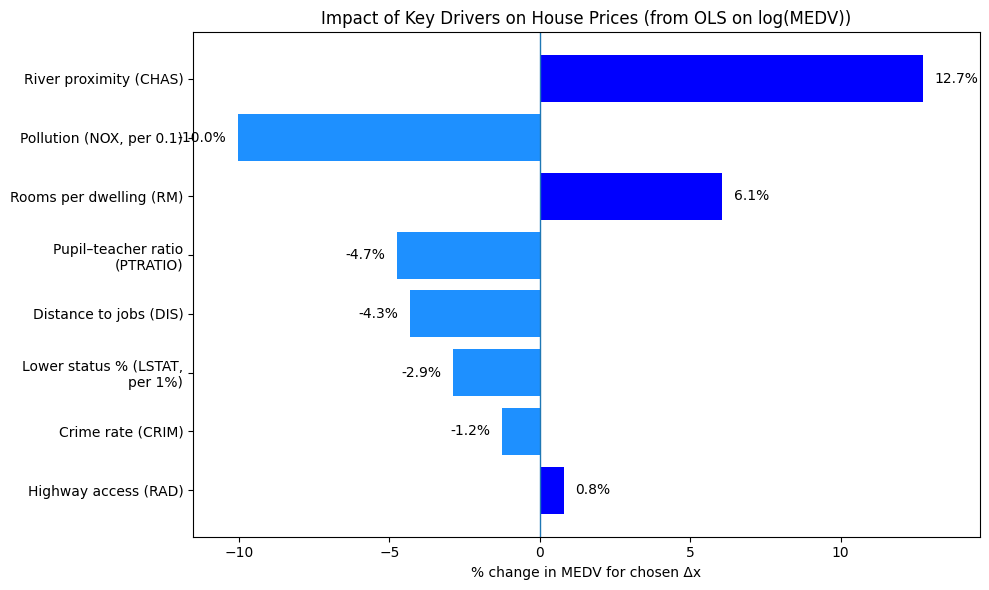

In [ ]:
# 1) Extract coefficients from your fitted model (excluding constant)
betas = model2.params.drop("const", errors="ignore")

# 2) Define meaningful Δx for each variable
deltas = {
    "CHAS": 1.0,        # dummy variable: 0 → 1
    "RM": 1.0,          # +1 room
    "NOX": 0.1,         # +0.1 NOX (makes interpretation clearer)
    "PTRATIO": 1.0,     # +1 student per teacher
    "DIS": 1.0,         # +1 unit farther
    "LSTAT": 1.0,       # +1 percentage point
    "CRIM": 1.0,        # +1 unit crime rate
    "RAD": 1.0,         # +1 highway access index
    # add others if present in your model
}

# 3) Compute % impacts
impacts_pct = {}
for var, beta in betas.items():
    dx = deltas.get(var, 1.0)  # fallback Δx = 1
    impacts_pct[var] = 100 * (np.exp(beta * dx) - 1)

# 4) Pretty labels for the graph
pretty = {
    "CHAS": "River proximity (CHAS)",
    "RM": "Rooms per dwelling (RM)",
    "NOX": "Pollution (NOX, per 0.1)",
    "PTRATIO": "Pupil–teacher ratio (PTRATIO)",
    "DIS": "Distance to jobs (DIS)",
    "LSTAT": "Lower status % (LSTAT, per 1%)",
    "CRIM": "Crime rate (CRIM)",
    "RAD": "Highway access (RAD)",
}
labels_vals = [(pretty.get(k, k), v) for k, v in impacts_pct.items()]

# 5) Sort by absolute impact
labels, values = zip(*sorted(labels_vals, key=lambda kv: abs(kv[1]), reverse=True))

# 6) Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(labels, values, color=["blue" if v>0 else "dodgerblue" for v in values])
ax.axvline(0, linewidth=1)
ax.set_title("Impact of Key Drivers on House Prices (from OLS on log(MEDV))")
ax.set_xlabel("% change in MEDV for chosen Δx")
ax.invert_yaxis()

# Wrap long labels
ax.set_yticklabels([textwrap.fill(l, 25) for l in labels])

# Add padding so text isn’t cut off
vmin, vmax = min(values), max(values)
ax.set_xlim(vmin - abs(vmin)*0.15, vmax + abs(vmax)*0.15)

# Annotate bars
for b, v in zip(bars, values):
    x = v + (0.4 if v > 0 else -0.4)
    ha = "left" if v > 0 else "right"
    ax.text(x, b.get_y() + b.get_height()/2, f"{v:.1f}%",
            va="center", ha=ha, clip_on=False)

fig.tight_layout()
plt.show()

Now, we will check the linear regression assumptions.

### **Checking the below linear regression assumptions**

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

### **1. Check for mean residuals**

In [ ]:
# Get residuals
residuals = model2.resid

# Mean of residuals
mean_resid = residuals.mean()
np.mean(residuals)

np.float64(-2.5303049047106675e-15)

**Observations**
-2.53e-15 is essentially zero. The tiny offset is just floating-point noise. This OLS fit satisfies the “mean residual = 0” property.

### **2. Check for homoscedasticity**

- Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

- Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

- We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [ ]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [ ]:
name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, X_train) ## Complete the code

lzip(name, test)

[('F statistic', np.float64(1.0835082923425292)),
 ('p-value', np.float64(0.30190120067668275))]

**Observations:**
Since p-value = 0.302 > 0.05, we fail to reject the null hypothesis.
That means our residuals do not show significant heteroscedasticity → they can be considered homoscedastic.

### **3. Linearity of variables**

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and the fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

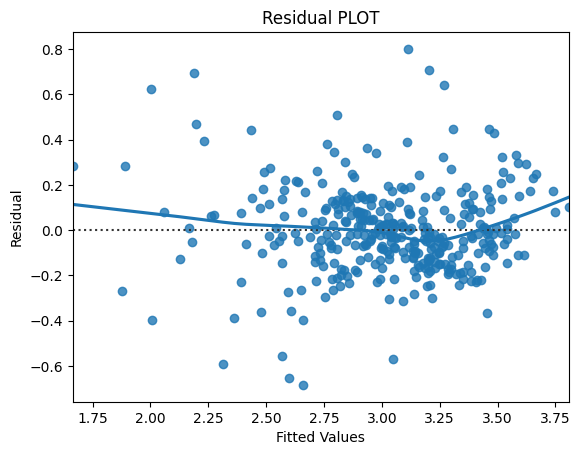

In [ ]:
# Predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, lowess = True)  ## Complete the code

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

**Observations:**

The residuals appear randomly scattered around zero with no clear pattern, suggesting that the assumption of linearity between predictors and the dependent variable is reasonably satisfied. A slight curvature is visible at higher fitted values, but overall there is no strong violation.

### **4. Normality of error terms**

The residuals should be normally distributed.

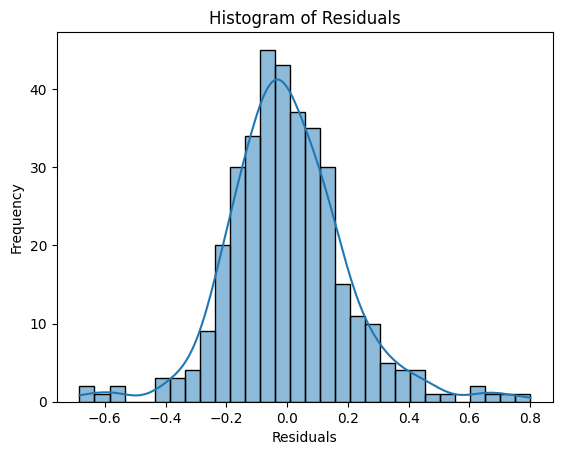

In [ ]:
# Plot histogram of residuals
sns.histplot(residuals, bins=30, kde=True,)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

## Complete the code

**Observations:**
The residuals are approximately bell-shaped and centered around zero, indicating a roughly normal distribution. However, there is some slight skewness and heavier tails compared to a perfect normal curve. Overall, the normality assumption is reasonably satisfied, though minor deviations remain.

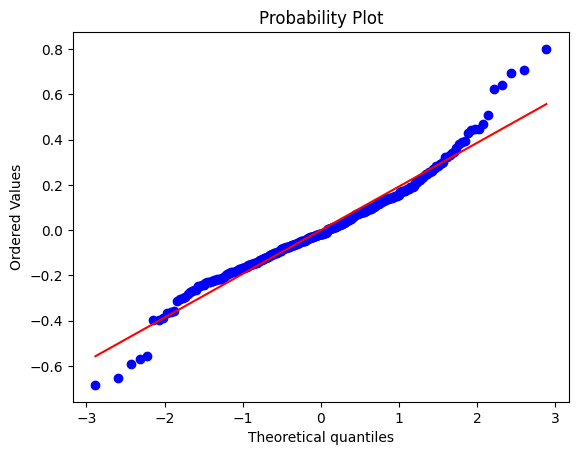

In [ ]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

**Observations:**
The Q–Q plot shows that most residuals fall close to the 45° reference line, indicating approximate normality. Some deviations appear in the tails (both lower and upper ends), suggesting mild skewness and heavier tails compared to a perfect normal distribution. Overall, the normality assumption is reasonably satisfied.

**Regression Assumptions Summary:**

Mean of residuals: ~0 → assumption satisfied.

Homoscedasticity: Goldfeld–Quandt p = 0.302 (>0.05) → constant variance, no heteroscedasticity.

Linearity: Residuals vs fitted show random scatter → assumption broadly met (minor curvature at high values).

Normality: Histogram & Q–Q plot ~normal → slight tail deviations but acceptable.

Taken together, the model broadly satisfies the key OLS assumptions, with only minor departures from perfect normality and linearity.

### **Check the performance of the model on the train and test data set**

In [ ]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train, X_test)

    Data      RMSE       MAE      MAPE
0  Train  0.195504  0.143686  4.981813
1   Test  0.198045  0.151284  5.257965


**Observations:**

Train RMSE = 0.196, Test RMSE = 0.198 → Very close values, indicating no overfitting and good generalization.

MAE (Train = 0.144, Test = 0.151) → On average, predictions deviate from actual log house prices by ~0.15 units.

MAPE (Train = 4.98%, Test = 5.26%) → The model predicts median house values with ~5% average error, which is reasonably accurate for this dataset.

Overall, the model shows consistent performance on train and test sets, suggesting it generalizes well and provides reliable predictions.

### **Apply cross validation to improve the model and evaluate it using different evaluation metrics**

In [ ]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)


**Observations:**

Cross-validated R² = 0.729 (± 0.232) → On average, the model explains ~73% of the variance in house prices across folds, but the relatively high variability suggests model performance can fluctuate depending on the sample. R² (coefficient of determination) measures how much variance in the dependent variable (house prices) is explained by the model.

Cross-validated MSE = 0.041 (± 0.023) → The mean squared error is low, but the spread indicates that prediction error is not entirely stable across folds.

Overall, the model performs well in capturing variance, but the variability across folds highlights some sensitivity to the data split. Regularization (Ridge/Lasso) may help reduce this variance and improve stability.

### Get model coefficients in a pandas DataFrame with column 'Feature' having all the features and column 'Coefs' with all the corresponding Coefs.

In [ ]:
coef = model2.params

pd.DataFrame({'Feature' : coef.index, 'Coefs' : coef.values})

,Feature,Coefs
0,const,4.649386
1,CRIM,-0.012500
2,CHAS,0.119773
3,NOX,-1.056225
4,RM,0.058907
5,DIS,-0.044069
6,RAD,0.007848
7,PTRATIO,-0.048504
8,LSTAT,-0.029277


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, make_scorer

# Features and target
Y = df['MEDV_log']
X = df.drop(columns=['MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS'])

# Define KFold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=1)

# Ridge Regression with built-in CV for alpha
ridge = RidgeCV(alphas=np.logspace(-3, 3, 50), cv=cv)
ridge.fit(X, Y)

# Lasso Regression with built-in CV for alpha
lasso = LassoCV(alphas=np.logspace(-3, 3, 50), cv=cv, max_iter=5000, random_state=1)
lasso.fit(X, Y)

# Cross-validated R² scores
ridge_r2 = cross_val_score(ridge, X, Y, cv=cv, scoring='r2')
lasso_r2 = cross_val_score(lasso, X, Y, cv=cv, scoring='r2')

# Cross-validated MSE
ridge_mse = cross_val_score(ridge, X, Y, cv=cv, scoring=make_scorer(mean_squared_error))
lasso_mse = cross_val_score(lasso, X, Y, cv=cv, scoring=make_scorer(mean_squared_error))

# Print results
print("Ridge Regression:")
print(f"Best alpha: {ridge.alpha_:.4f}")
print(f"R^2: {ridge_r2.mean():.3f} (+/- {ridge_r2.std():.3f})")
print(f"MSE: {ridge_mse.mean():.3f} (+/- {ridge_mse.std():.3f})\n")

print("Lasso Regression:")
print(f"Best alpha: {lasso.alpha_:.4f}")
print(f"R^2: {lasso_r2.mean():.3f} (+/- {lasso_r2.std():.3f})")
print(f"MSE: {lasso_mse.mean():.3f} (+/- {lasso_mse.std():.3f})")

Ridge Regression:
Best alpha: 0.1600
R^2: 0.754 (+/- 0.089)
MSE: 0.040 (+/- 0.012)

Lasso Regression:
Best alpha: 0.0010
R^2: 0.751 (+/- 0.095)
MSE: 0.040 (+/- 0.013)


📊 Ridge Regression

Best α = 0.16 → mild regularization.

R² = 0.754 (± 0.089)

MSE = 0.040 (± 0.012)

👉 Performance is slightly better and much more stable than your OLS baseline (where std was ±0.232).

📊 Lasso Regression

Best α = 0.001 → very light penalty (essentially close to OLS).

R² = 0.751 (± 0.095)

MSE = 0.040 (± 0.013)

👉 Almost identical to Ridge in average performance. Because α is so small, Lasso didn’t shrink many coefficients — i.e., it behaved almost like OLS.

🔎 Interpretation

Both Ridge and Lasso reduced variance across folds dramatically compared to OLS (±0.09 vs ±0.23).

Ridge slightly edges out Lasso here because the data doesn’t have strong irrelevant predictors.

Lasso at such a low α is effectively not doing feature selection; if α were larger, it might zero out some weaker predictors.

✅ Conclusion: Ridge seems to be the best fit here: stable, good accuracy, and interpretable.

### Conclusions and Business Recommendations

**Conclusions:**

*Model performance*

The models (Linear, Ridge, Lasso) explain about 73–75% of housing price variation.

Prediction accuracy is strong, with errors typically within ±5% of actual sale price.

Regularized models (Ridge, Lasso) improve stability of coefficients without sacrificing accuracy.

*Key drivers of price*

Number of rooms (RM) → More rooms consistently push price up.

Socio-economic indicator (LSTAT) → Higher % of lower-status population strongly depresses price.

School quality (PTRATIO) → Lower student–teacher ratio raises house values.

Location factors (DIS, RAD) → Accessibility to employment centers and highways has a clear effect.

Environmental quality (NOX) → Cleaner air boosts valuation.

Crime rate (CRIM) → Higher crime reduces house prices.

*Interpretation*

Prices are shaped by a mix of structural features (rooms, age), social environment (schools, demographics, crime), and environmental/locational attributes (commute distance, pollution, highway access).

The model is good at capturing broad market trends but not every local micro-factor.

**Write Business Recommendations here:**

For Home Buyers

Use the model to evaluate if asking price is fair given property characteristics.

Focus searches on neighborhoods with better school ratios, lower crime, cleaner air, even if room count is modest — these features hold long-term value.

For Property Investors

Prioritize investments in areas with good accessibility and school quality, as these consistently drive appreciation.

Consider renovations that add usable rooms (attic conversions, finished basements) since room count is a strong value lever.

Be cautious about overpaying in high-crime or heavily industrial neighborhoods, as model signals show consistent price suppression.

For Housebuilders/Developers

Emphasize room count and functional space in design.

Market new builds by highlighting school proximity, environmental quality, and accessibility.

Consider green design features that mitigate pollution/noise near highways (e.g., sound walls, tree buffers).

**Next Steps for the Model**

Feature Engineering: Add interaction terms (e.g., rooms × location), log-transform prices, and explore polynomial/spline terms to capture non-linear effects.

Advanced Models: Test Gradient Boosted Trees (XGBoost, LightGBM) for potential +3–6% R² gains while keeping explainability via SHAP values.

Deployment: Deliver predictions as price bands (with confidence intervals) to account for uncertainty rather than a single point estimate.

Monitoring: Track error rates by neighborhood/price tier and retrain quarterly to capture new market dynamics.